# Matplotlib Histograms Problems

**df.plot(kind='hist')**

## Statistical Analysis

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst Data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

### Data Scientist Hourly Salaries (2.17.1) - Problem


Create a histogram to show the distribution of hourly salaries (use **salary_hour_avg** column) for Data Scientist job postings:

- Create a new DataFrame called **df_DS** to filter out 'Data Scientist' jobs.
- Customize the plot by setting the number of bins to 40 and the bar color to blue.
- Label the x-axis as 'Hourly Salary' and the y-axis as 'Number of Jobs'.

Hint:

Use the DataFrames **plot()** method and set the **bins** parameter to 40 and the **color** parameter to 'blue'.

In [3]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS = df_DS.dropna(subset=['salary_hour_avg'])

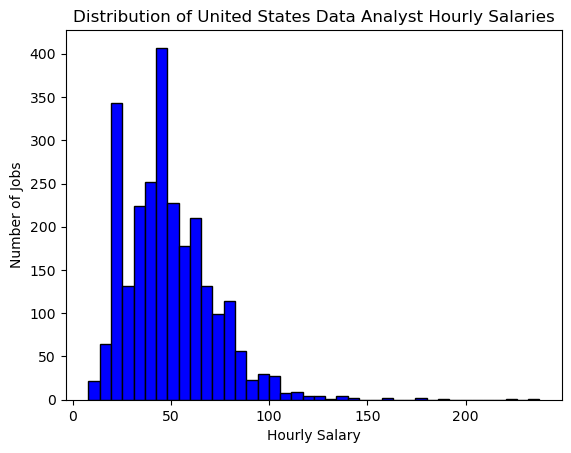

In [4]:
df_DS['salary_hour_avg'].plot(kind='hist', bins=40, color='blue', edgecolor='black')

# Adding titles
plt.title('Distribution of United States Data Analyst Hourly Salaries')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.show()

### Job Postings by Number of Skills (2.17.2) - Problem


Create a histogram to show the distribution of job postings by the number of skills listed using the **job_skills** column:

- Create a new DataFrame called **df_skills** to filter out job postings with non-null **job_skills**.
- Customize the plot by setting the number of bins to 55, the bar color to 'magenta'
- Add a title 'Distribution of Job Postings by Number of Skills Listed'.
- Label the x-axis as 'Number of Skills' and the y-axis as 'Number of Job Postings'.

Hint:

Use the DataFrames **plot()** method and set the **bins** parameter to 55, the **color** parameter to 'magenta', and **edgecolor** to 'black'.

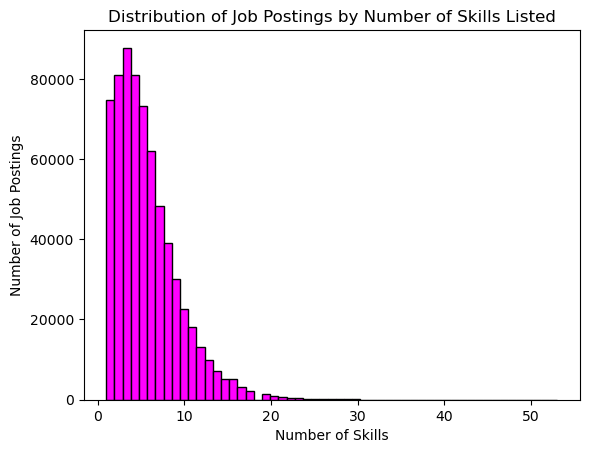

In [14]:
df_skills = df[df['job_skills'].notna()].copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)

# Plot the histogram
df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.show()

### Data Engineer Salaries (2.17.3) - Problem


Create a histogram to show the distribution of average yearly salaries (**salary_year_avg**) for Data Engineer job postings:

- Create a new DataFrame called **df_DE** to filter out 'Data Engineer' jobs.
- Customize the plot by setting the number of bins to 50, the bar color to red
- Add annotations for the mean and median salaries, using **plt.axvline()**; for the parameters specify:
    - **color**: 'blue'/'green'
    - **linestyle**: 'dashed'
    - **label**: e.g., **f'Mean: ${mean_salary:,.0f}'**
- Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.

Hint:

Use the DataFrames **plot()** method and set the **bins** parameter to 50 and the **color** parameter to 'red'. Use **plt.axvline()** to add annotations for the mean and median salaries.

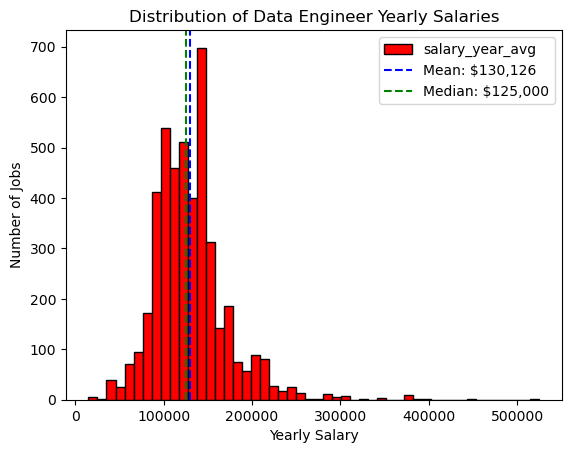

In [18]:
# Filter out the data
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE = df_DE.dropna(subset=['salary_year_avg'])

# Get mean and median
mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

# Plot the histogram
df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='r', edgecolor='black')
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')  #prints a dashed green line for the mean
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}') #prints a dashed blue line for the median
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()